In [2]:
import pandas as pd
import numpy as np

In [3]:
tokyo_wards = ['Chiyoda',
'Chūō',
'Minato',
'Shinjuku',
'Bunkyō',
'Taitō',
'Sumida',
'Kōtō',
'Shinagawa',
'Meguro',
'Ōta',
'Setagaya',
'Shibuya',
'Nakano',
'Suginami',
'Toshima',
'Kita',
'Arakawa',
'Itabashi',
'Nerima',
'Adachi',
'Katsushika',
'Edogawa']

In [4]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

lat_long = np.empty([23, 2], dtype = 'f')
geolocator = Nominatim(user_agent="foursquare_agent")

#find the locations of boroughs
for i in range (0,23):
    ward = tokyo_wards[i]
    address = ward+' Tokyo, JP'
    
    location = geolocator.geocode(address)
    lat_long[i][0] = location.latitude
    lat_long[i][1] = location.longitude
    
lat_long

array([[ 35.685402, 139.75273 ],
       [ 35.666256, 139.77556 ],
       [ 35.643227, 139.74005 ],
       [ 35.688362, 139.69908 ],
       [ 35.71881 , 139.74474 ],
       [ 35.71745 , 139.79086 ],
       [ 35.700428, 139.80502 ],
       [ 35.649155, 139.81279 ],
       [ 35.59925 , 139.7389  ],
       [ 35.62125 , 139.68802 ],
       [ 35.561207, 139.71584 ],
       [ 35.646095, 139.65627 ],
       [ 35.664597, 139.69872 ],
       [ 35.718124, 139.66447 ],
       [ 35.699493, 139.63629 ],
       [ 35.736156, 139.71422 ],
       [ 35.755836, 139.7367  ],
       [ 35.73753 , 139.78131 ],
       [ 35.774143, 139.68121 ],
       [ 35.74836 , 139.63873 ],
       [ 35.783703, 139.79532 ],
       [ 35.75173 , 139.86382 ],
       [ 35.737705, 139.89612 ]], dtype=float32)

In [5]:
lat_long[:,0]

array([35.685402, 35.666256, 35.643227, 35.688362, 35.71881 , 35.71745 ,
       35.700428, 35.649155, 35.59925 , 35.62125 , 35.561207, 35.646095,
       35.664597, 35.718124, 35.699493, 35.736156, 35.755836, 35.73753 ,
       35.774143, 35.74836 , 35.783703, 35.75173 , 35.737705],
      dtype=float32)

In [6]:
df_tokyo_wards = pd.DataFrame(tokyo_wards)

In [7]:
df_tokyo_wards.columns = ['Wards']

In [8]:
df_tokyo_wards["Latitude"] = lat_long[:,0]
df_tokyo_wards["Longitude"] = lat_long[:,1]

In [9]:
df_tokyo_wards.head()

,Wards,Latitude,Longitude
0,Chiyoda,35.685402,139.752731
1,Chūō,35.666256,139.775558
2,Minato,35.643227,139.740051
3,Shinjuku,35.688362,139.699081
4,Bunkyō,35.718811,139.744736


In [10]:
import requests # library to handle requests

In [11]:
#client id and secret 
CLIENT_ID = 'VVXO3NE4K1FTDYXZTXWPBFLGRTTT00NQVZBXV4UODTNGZ4GR' # your Foursquare ID
CLIENT_SECRET = 'RNTSIGLCQEXNRM3LAQOVRHHGJQ4YJYO3RWYVTVFT5RMUKM3O' # your Foursquare Secret
VERSION = '20180604' #date given as previous date intentionally
LIMIT = 30
radius = 1000

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Wards', 
                  'Wards Latitude', 
                  'Wards Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
tokyo_venues = getNearbyVenues(names=df_tokyo_wards['Wards'],
                                   latitudes=df_tokyo_wards['Latitude'],
                                   longitudes=df_tokyo_wards['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


In [14]:
tokyo_venues

,Wards,Wards Latitude,Wards Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.685402,139.752731,Imperial Palace (皇居),35.682500,139.752100,Palace
1,Chiyoda,35.685402,139.752731,Imperial Palace Loop (皇居ランニングコース),35.684204,139.753067,Track
2,Chiyoda,35.685402,139.752731,Imperial Palace East Garden (皇居東御苑),35.685797,139.756662,Park
3,Chiyoda,35.685402,139.752731,江戸城 本丸御殿,35.686163,139.755975,Historic Site
4,Chiyoda,35.685402,139.752731,宮殿東庭 (新宮殿前広場),35.682181,139.754012,Palace
...,...,...,...,...,...,...,...
608,Edogawa,35.737705,139.896118,スカイプール,35.736402,139.892499,Gym Pool
609,Edogawa,35.737705,139.896118,Honda Dream (ホンダドリーム江戸川),35.734344,139.893433,Motorcycle Shop
610,Edogawa,35.737705,139.896118,Jazz Live Spot Full House,35.735795,139.891605,Music Venue
611,Edogawa,35.737705,139.896118,一里塚交差点,35.733842,139.893540,Intersection


In [15]:
#how many unique categories exist
len(tokyo_venues['Venue Category'].unique())

144

In [16]:
tokyo_venues2 = tokyo_venues

Analyze Each Ward

In [17]:
# one hot encoding
tokyo_venues2_onehot = pd.get_dummies(tokyo_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_venues2_onehot['Wards'] = tokyo_venues2['Wards'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_venues2_onehot.columns[-1]] + list(tokyo_venues2_onehot.columns[:-1])
tokyo_venues2_onehot = tokyo_venues2_onehot[fixed_columns]

tokyo_venues2_onehot.head()

,Wards,ATM,Arcade,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Baseball Field,...,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
tokyo_venues2_onehot.columns.values

array(['Wards', 'ATM', 'Arcade', 'Arts & Crafts Store',
       'Asian Restaurant', 'Auto Garage', 'BBQ Joint', 'Bakery', 'Bar',
       'Baseball Field', 'Bath House', 'Beer Bar',
       'Bike Rental / Bike Share', 'Bistro', 'Botanical Garden',
       'Bowling Alley', 'Brazilian Restaurant', 'Burger Joint',
       'Bus Station', 'Bus Stop', 'Café', 'Camera Store', 'Canal',
       'Castle', 'Chinese Restaurant', 'Cocktail Bar', 'Coffee Shop',
       'Comedy Club', 'Concert Hall', 'Convenience Store', 'Cupcake Shop',
       'Deli / Bodega', 'Dessert Shop', 'Diner', 'Discount Store',
       'Dog Run', 'Donburi Restaurant', 'Dongbei Restaurant', 'Drugstore',
       'Dumpling Restaurant', 'Electronics Store', 'Event Space',
       'Fabric Shop', 'Fast Food Restaurant', 'Fishing Store',
       'Flea Market', 'French Restaurant', 'Fried Chicken Joint',
       'Furniture / Home Store', 'Gaming Cafe', 'Garden',
       'Golf Driving Range', 'Gourmet Shop', 'Grocery Store',
       'Gym / Fitness C

In [40]:
Foods = ['Asian Restaurant', 'BBQ Joint', 'Bakery', 'Bar', 'Beer Bar', 'Bistro', 'Brazilian Restaurant', 'Burger Joint', 'Café',  'Chinese Restaurant',
       'Cocktail Bar', 'Coffee Shop',
       'Convenience Store', 'Cupcake Shop', 'Deli / Bodega',
       'Dessert Shop', 'Diner', 
       'Donburi Restaurant', 'Dongbei Restaurant', 
       'Dumpling Restaurant','Fast Food Restaurant','French Restaurant', 'Fried Chicken Joint','Grocery Store',
       'Ice Cream Shop', 'Indian Restaurant', 
       'Italian Restaurant', 'Japanese Curry Restaurant',
       'Japanese Restaurant',  'Kaiseki Restaurant', 'Kebab Restaurant', 'Korean Restaurant',
       'Kosher Restaurant', 
       'Market', 'Middle Eastern Restaurant', 'Noodle House',
         'Pizza Place','Ramen Restaurant', 'Restaurant', 'Sake Bar', 'Salad Place',
       'Seafood Restaurant', 'Soba Restaurant', 'Spanish Restaurant', 'Steakhouse', 
       'Sukiyaki Restaurant', 'Supermarket', 'Sushi Restaurant', 'Tea Room',
       'Tempura Restaurant', 'Thai Restaurant', 
       'Tonkatsu Restaurant', 'Udon Restaurant',
       'Unagi Restaurant', 
       'Wagashi Place', 'Wine Bar', 'Yakitori Restaurant',
       'Yoshoku Restaurant']

In [29]:
Entertainment = ['Arcade', 'Baseball Field',
       'Bath House', 'Bowling Alley',  'Comedy Club', 'Concert Hall',
        'Event Space', 'Gaming Cafe', 'Jazz Club', 
       'Karaoke Box',
       'Mini Golf',  'Movie Theater', 'Museum','Music Venue', 'Nightclub', 'Playground', 'Plaza', 'Ramen Restaurant',
     'Recording Studio', 'Rock Club', 'Rugby Pitch', 'Soccer Field', 'Sports Club',
      'Strip Club','Theater', 'Toll Booth','Toy / Game Store']

In [34]:
Shopping = ['Arts & Crafts Store',
       'Auto Garage',  'Bike Rental / Bike Share',
       'Camera Store', 'Discount Store', 'Electronics Store', 
       'Fabric Shop', 'Fishing Store',
       'Flea Market', 
       'Furniture / Home Store',  'Hardware Store', 'Hobby Shop', 'Leather Goods Store', 'Liquor Store',
        'Motorcycle Shop', 
       'Music Store', 
       'Record Shop',
       'Stationery Store','Shopping Mall', 'Toy / Game Store', 'Used Bookstore', 'Video Store']

In [36]:
Sightseeing_accomodation = [ 'ATM',
       'Botanical Garden','Bus Stop', 'Canal', 'Castle', 'Dog Run',
       'Historic Site', 'History Museum', 'Hobby Shop', 'Hostel', 'Hotel', 'Intersection',
         'Metro Station','Motel', 'Museum','Outdoor Sculpture', 'Palace',
        'Park', 'Pharmacy', 
       'Platform', 'Plaza', 'Rest Area',
       'Road', 'Track', 'Trail',
       'Train Station', 'Tram Station', 'Tunnel']

In [69]:
df_merge_col = df_tokyo_wards

Aggregate the wards based on Food, Entertainment, Sightseeing Accomodation and Shoppping

In [84]:
df_tokyo_wards_sum = tokyo_venues2_onehot.groupby('Wards').sum()

In [41]:
df_tokyo_entert = pd.DataFrame(df_tokyo_wards_sum[Entertainment].sum(axis=1))
df_tokyo_shop = pd.DataFrame(df_tokyo_wards_sum[Shopping].sum(axis=1))
df_tokyo_sightseeing = pd.DataFrame(df_tokyo_wards_sum[Sightseeing_accomodation].sum(axis=1))
df_tokyo_foods = pd.DataFrame(df_tokyo_wards_sum[Foods].sum(axis=1))

In [85]:
df_tokyo_wards_sum

,ATM,Arcade,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Baseball Field,Bath House,...,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
Wards,,,,,,,,,,,,,,,,,,,,,
Adachi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arakawa,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Bunkyō,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chiyoda,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Chūō,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Edogawa,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Itabashi,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Katsushika,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kita,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [117]:
#merge each df by using their indeces
df_merge_col = pd.merge(df_merge_col, df_tokyo_entert, on='Wards')
df_merge_col = pd.merge(df_merge_col, df_tokyo_shop, on='Wards')
df_merge_col = pd.merge(df_merge_col, df_tokyo_sightseeing, on='Wards')
df_merge_col = pd.merge(df_merge_col, df_tokyo_foods, on='Wards')


In [100]:
df_merge

,index,Wards,Latitude,Longitude,0_x,0_y,0_x,0_y
0,0,Chiyoda,35.685402,139.752731,1,0,16,0
1,1,Chūō,35.666256,139.775558,0,0,1,29
2,2,Minato,35.643227,139.740051,1,2,3,22
3,3,Shinjuku,35.688362,139.699081,2,4,2,22
4,4,Bunkyō,35.718811,139.744736,1,0,7,9
5,5,Taitō,35.717449,139.790863,3,1,2,24
6,6,Sumida,35.700428,139.805023,4,1,3,24
7,7,Kōtō,35.649155,139.812790,2,0,20,9
8,8,Shinagawa,35.599251,139.738907,1,2,9,18
9,9,Meguro,35.621250,139.688019,3,1,5,16


In [101]:
df_merge.columns = ["Index","Wards","Latitude","Longitude","Entertainment","Shopping","Sightseeing_Accommodation","Foods"]

In [103]:
df_merge_transform = df_merge

Normalization

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_merge_transform[["Entertainment","Shopping","Sightseeing_Accommodation","Foods"]])
df_merge_transform[["Entertainment","Shopping","Sightseeing_Accommodation","Foods"]] = scaler.transform(df_merge_transform[["Entertainment","Shopping","Sightseeing_Accommodation","Foods"]])

In [105]:
df_merge_transform

,Index,Wards,Latitude,Longitude,Entertainment,Shopping,Sightseeing_Accommodation,Foods
0,0,Chiyoda,35.685402,139.752731,-0.814266,-0.899438,2.260594,-2.318431
1,1,Chūō,35.666256,139.775558,-1.161083,-0.899438,-0.909751,1.626450
2,2,Minato,35.643227,139.740051,-0.814266,0.249844,-0.487039,0.674238
3,3,Shinjuku,35.688362,139.699081,-0.467449,1.399126,-0.698395,0.674238
4,4,Bunkyō,35.718811,139.744736,-0.814266,-0.899438,0.358387,-1.094158
5,5,Taitō,35.717449,139.790863,-0.120632,-0.324797,-0.698395,0.946298
6,6,Sumida,35.700428,139.805023,0.226185,-0.324797,-0.487039,0.946298
7,7,Kōtō,35.649155,139.812790,-0.467449,-0.899438,3.106019,-1.094158
8,8,Shinagawa,35.599251,139.738907,-0.814266,0.249844,0.781100,0.130116
9,9,Meguro,35.621250,139.688019,-0.120632,-0.324797,-0.064326,-0.141945


In [106]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library


# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 3

df_merge_cluster = df_merge_transform[["Entertainment","Shopping","Sightseeing_Accommodation","Foods"]]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_merge_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:23] 

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2])

In [107]:
# add clustering labels
ward_venues_category = kmeans.labels_

In [108]:
df_merge_transform.index.name = "Wards_number"

Visualize

In [110]:
df_merge["Cluster Labels"] = kmeans.labels_

In [114]:
df_merge

,Wards,Latitude,Longitude,Entertainment,Shopping,Sightseeing_Accommodation,Foods,Cluster Labels
Wards_number,,,,,,,,
0,Chiyoda,35.685402,139.752731,-0.814266,-0.899438,2.260594,-2.318431,2
1,Chūō,35.666256,139.775558,-1.161083,-0.899438,-0.909751,1.626450,1
2,Minato,35.643227,139.740051,-0.814266,0.249844,-0.487039,0.674238,1
3,Shinjuku,35.688362,139.699081,-0.467449,1.399126,-0.698395,0.674238,1
4,Bunkyō,35.718811,139.744736,-0.814266,-0.899438,0.358387,-1.094158,2
5,Taitō,35.717449,139.790863,-0.120632,-0.324797,-0.698395,0.946298,1
6,Sumida,35.700428,139.805023,0.226185,-0.324797,-0.487039,0.946298,1
7,Kōtō,35.649155,139.812790,-0.467449,-0.899438,3.106019,-1.094158,2
8,Shinagawa,35.599251,139.738907,-0.814266,0.249844,0.781100,0.130116,2


In [115]:
map_clusters = folium.Map(location=[35.688362, 139.699081], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Wards'], df_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

,Wards,Latitude,Longitude,Entertainment,Shopping,Sightseeing_Accommodation,Foods,Cluster Labels
Wards_number,,,,,,,,
0,Chiyoda,35.685402,139.752731,-0.814266,-0.899438,2.260594,-2.318431,2
1,Chūō,35.666256,139.775558,-1.161083,-0.899438,-0.909751,1.626450,1
2,Minato,35.643227,139.740051,-0.814266,0.249844,-0.487039,0.674238,1
3,Shinjuku,35.688362,139.699081,-0.467449,1.399126,-0.698395,0.674238,1
4,Bunkyō,35.718811,139.744736,-0.814266,-0.899438,0.358387,-1.094158,2
5,Taitō,35.717449,139.790863,-0.120632,-0.324797,-0.698395,0.946298,1
6,Sumida,35.700428,139.805023,0.226185,-0.324797,-0.487039,0.946298,1
7,Kōtō,35.649155,139.812790,-0.467449,-0.899438,3.106019,-1.094158,2
8,Shinagawa,35.599251,139.738907,-0.814266,0.249844,0.781100,0.130116,2


In [125]:
df_merge_col.columns = ["Wards","Latitude","Longitude","Entertainment","Shopping","Sightseeing_Accommodation","Foods","Cluster Labels",
                                           "Entertainment_number","Shopping_number","Sightseeing_Accommodation_number","Foods_number"]

In [126]:
df_merge_col

,Wards,Latitude,Longitude,Entertainment,Shopping,Sightseeing_Accommodation,Foods,Cluster Labels,Entertainment_number,Shopping_number,Sightseeing_Accommodation_number,Foods_number
0,Chiyoda,35.685402,139.752731,-0.814266,-0.899438,2.260594,-2.318431,2,1,0,16,0
1,Chūō,35.666256,139.775558,-1.161083,-0.899438,-0.909751,1.626450,1,0,0,1,29
2,Minato,35.643227,139.740051,-0.814266,0.249844,-0.487039,0.674238,1,1,2,3,22
3,Shinjuku,35.688362,139.699081,-0.467449,1.399126,-0.698395,0.674238,1,2,4,2,22
4,Bunkyō,35.718811,139.744736,-0.814266,-0.899438,0.358387,-1.094158,2,1,0,7,9
5,Taitō,35.717449,139.790863,-0.120632,-0.324797,-0.698395,0.946298,1,3,1,2,24
6,Sumida,35.700428,139.805023,0.226185,-0.324797,-0.487039,0.946298,1,4,1,3,24
7,Kōtō,35.649155,139.812790,-0.467449,-0.899438,3.106019,-1.094158,2,2,0,20,9
8,Shinagawa,35.599251,139.738907,-0.814266,0.249844,0.781100,0.130116,2,1,2,9,18
9,Meguro,35.621250,139.688019,-0.120632,-0.324797,-0.064326,-0.141945,1,3,1,5,16


Text(0.5, 1.0, 'Popular Food Places in Top 30')

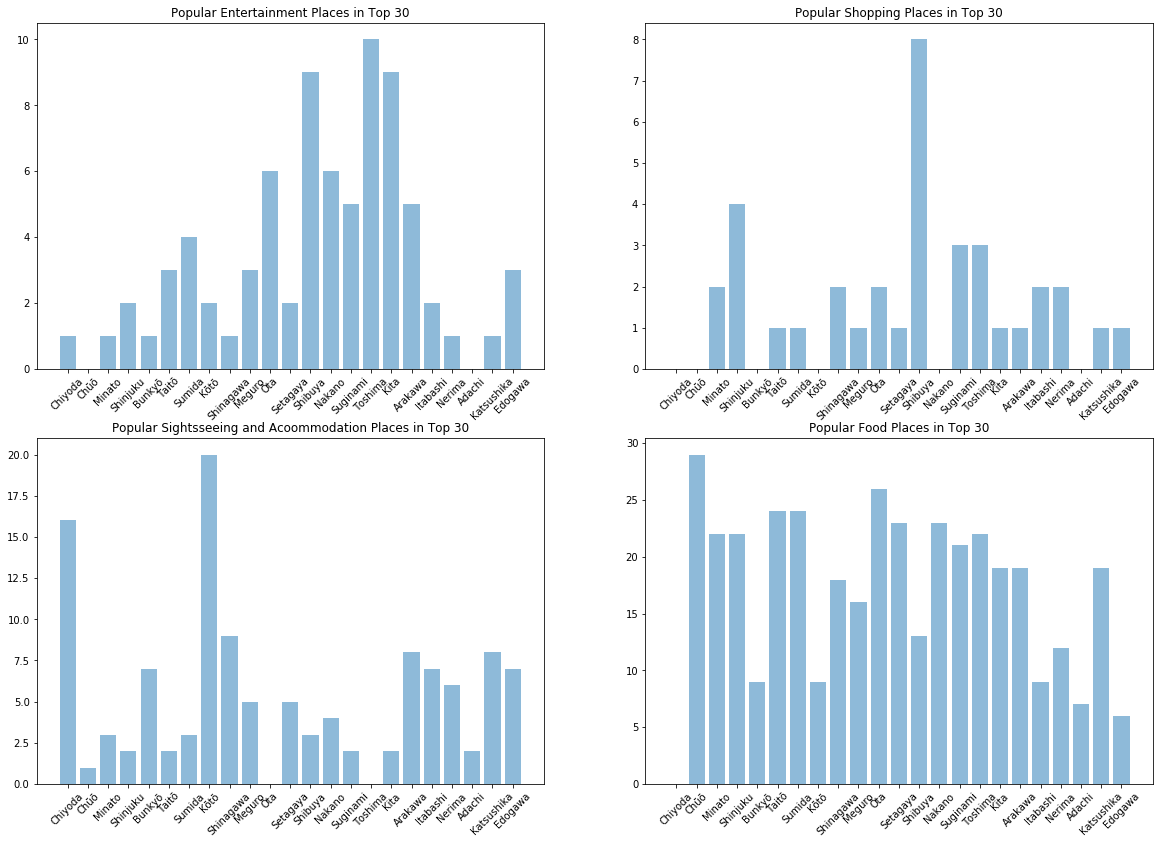

In [152]:
import matplotlib.pyplot as plt
# old style
fig = plt.figure(figsize=(20, 14))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)

ax1.bar(df_merge_col["Wards"], df_merge_col["Entertainment_number"], align='center', alpha=0.5)
ax2.bar(df_merge_col["Wards"], df_merge_col["Shopping_number"], align='center', alpha=0.5)
ax3.bar(df_merge_col["Wards"], df_merge_col["Sightseeing_Accommodation_number"], align='center', alpha=0.5)
ax4.bar(df_merge_col["Wards"], df_merge_col["Foods_number"], align='center', alpha=0.5)

ax1.set_title('Popular Entertainment Places in Top 30')
ax2.set_title('Popular Shopping Places in Top 30')
ax3.set_title('Popular Sightsseeing and Acoommodation Places in Top 30')
ax4.set_title('Popular Food Places in Top 30')

In [153]:
map_clusters = folium.Map(location=[35.688362, 139.699081], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Wards'], df_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters